# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer as knn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as sk_pp
from sklearn.model_selection import train_test_split

%matplotlib inline

## Get Data

In [3]:
data = pd.read_csv('../../../../Data_AA2/bank-additional-full.csv', sep = ';',na_values="unknown")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

Converter valores da coluna 'duration' para valores menores

In [6]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Converter valores da coluna 'age' para faixas etárias

In [7]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Passar os valores categóricos para valores numéricos

In [8]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['job']) 
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education']) 
data['default'] = le.fit_transform(data['default']) 
data['housing'] = le.fit_transform(data['housing']) 
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact']) 
data['month'] = le.fit_transform(data['month']) 
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])

#data['y'].replace(['no', 'yes'], [0,1], inplace  = True)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,3,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,2,9,2,5,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
11,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
12,2,1,2,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
13,3,3,0,0,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


Separar o target do dataset

In [9]:
data2 = data
data_Y = data['y']
data = data.drop(columns=['y']) 

### Análise não supervisionada

Realizar o préprocessamento do dataset

In [10]:
from sklearn import preprocessing
sc_input = preprocessing.scale(data)

Realizar um processo de PCA que explique pelo menos 80% da variabilidade

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
pca.fit(sc_input)
X_reduced = pca.transform(sc_input)
X_reduced.shape[1]

12

Represente a variância explicada por cada uma das primeiras 10 PCs usando um gráfico apropriado

Var. explained: [0.20618899 0.08455094 0.07263322 0.06549139 0.05588569 0.05555612
 0.05180538 0.05098318 0.04976389 0.04895039 0.04752517 0.0460379 ]


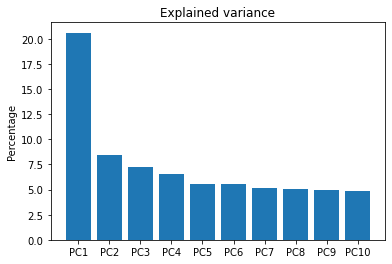

In [11]:
import matplotlib.pyplot as plt

print('Var. explained: %s'% str(pca.explained_variance_ratio_))
n_pc = 10

plt.bar(range(n_pc), pca.explained_variance_ratio_[0:10]*100)
plt.xticks(range(n_pc), ['PC'+str(i) for i in range(1,n_pc+1)])
plt.title("Explained variance")
plt.ylabel("Percentage")
plt.show()

In [12]:
data2['y'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
X_reduced

array([[-1.75331781,  0.9446434 ,  1.89443282, ...,  0.78830719,
         0.13471074,  0.01764762],
       [-1.63152321,  0.8309753 ,  0.94406138, ...,  0.8967233 ,
        -1.37785   ,  0.20638485],
       [-1.78619184,  0.81361005,  1.84847675, ...,  0.31237017,
         0.54051322,  0.68366037],
       ...,
       [ 1.73371315, -0.12467803,  0.44839429, ...,  1.6936384 ,
        -1.7248041 , -0.32454117],
       [ 1.71842838,  0.16683607,  0.61780727, ...,  2.52129338,
        -0.87631886, -1.66607157],
       [ 2.50253681, -0.85881344,  2.40868858, ...,  1.32044483,
        -1.44050379,  0.32598396]])

Correr clustering k-means; comparar clusters com variável de interesse

In [17]:
from sklearn.cluster import KMeans

k=2
kmeans_model= KMeans(n_clusters=k, max_iter=1000)
kmeans_model.fit(sc_input)
labels = kmeans_model.labels_

pd.crosstab(labels, data2["y"], rownames=['clusters'] )

y,no,yes
clusters,,
0,8878,2906
1,17751,953
